<IPython.core.display.Javascript object>

Theta: 2.123612636628369
Theta: 1.8080172595490245
Theta: 1.5078290387981705
Theta: 1.2489668049128222
Theta: 1.0371066388079506
Theta: 0.8677005887291664
Theta: 0.7330475434460171
Theta: 0.6256512338186501
Theta: 0.539303353308108
Theta: 0.46918273580384867
Theta: 0.41163887077113714
Theta: 0.3639267239633948
Theta: 0.3239775902916819
Theta: 0.2902218659840904
Theta: 0.26145791970896703
Theta: 0.2367567124712783
Theta: 0.21539269640222555
Theta: 0.19679361453776198
Theta: 0.18050380126741497
Theta: 0.16615713341590513
Theta: 0.15345691373115006
Theta: 0.14216076986391957
Theta: 0.13206921225092874
Theta: 0.12301688495314494
Theta: 0.11486581643489403
Theta: 0.10750016894204335
Theta: 0.10082212066077181
Theta: 0.09474861140303366
Theta: 0.08920875193505269
Theta: 0.08414174731727395


Text(0, 0.5, '$\\theta$ (rad)')

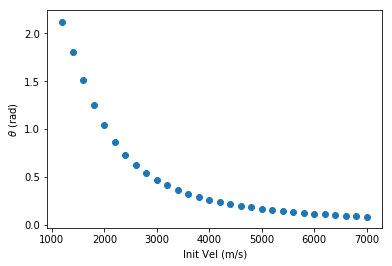

In [5]:
from vpython import *
import numpy as np
from numpy import linspace, pi, array, sqrt, ones, copy, cos, sin
from pylab import plot, show, xlabel, ylabel, legend, figure, scatter

'''
Planet is fixed at (0, 0). Firing satellite directly in its path to see behavior.
Will add velocity to planet later. Want to see how close this is to an elastic collision. 
'''

def alpha(r):
    x = r[0]
    y = r[1]
    rcube = sqrt(x**2 + y**2)**3
    
    return array([-G*M*x/rcube, -G*M*y/rcube], float)

# constants
M = 5.972e24
m = 2e13
R = 3.844e8
G = 6.67408e-11
dt = 60

# initial conditions
# [x,y]
r = array([-2*R, 0.5*R], float)  # assume perigee is starting x intercept
# [vx, vy]
v = array([1e3, 0], float)
t = 0

# data
xlist = []
ylist = []
tlist = []
Epotlist = []
Ekinlist = []
Elist = []

# half step
vmid = v + alpha(r)*0.5*dt

# vpython setup
scene = canvas(background = color.white, align="left", center=vector(0,0,0))
earth = sphere(pos=vector(0,0,0), radius=0.2, color=color.blue, make_trail=True)
satellite = sphere(pos=vector(r[0]/R,r[1]/R,0), radius = 0.08, color=color.magenta, make_trail=True)

temp = 1e3

thetas = []
vels  = []

# approximated using months -> seconds conversion
for k in range(30):
    temp += 2e2
    
    vels.append(temp)
    
    r = array([-2*R, 0.5*R], float)
    v = array([temp, 0], float)
    t = 0
    xlist = []
    ylist = []
    tlist = []
    Epotlist = []
    Ekinlist = []
    Elist = []
    
    vmid = v + alpha(r)*0.5*dt
    
    while t < 0.25*2629743:
#         rate(1000)

        # unpack for energy
        x, y = r[0], r[1]
        vx, vy = v[0], v[1]
        rmag = sqrt(x**2 + y**2)
        vmag = sqrt(vx**2 + vy**2)

        satellite.pos = vector(r[0]/R, r[1]/R, 0)

        xlist.append(x)
        ylist.append(y)

        U = -G*M*m/rmag
        KE = 0.5*m*vmag**2

        tlist.append(t)
        Epotlist.append(U)
        Ekinlist.append(KE)
        Elist.append(U + KE)

        # verlet method
        r += vmid*dt
        v = vmid + alpha(r)*0.5*dt
        vmid += alpha(r)*dt
        t += dt

    th = abs(np.arctan(v[1]/v[0]))
    if v[0] < 0:
        th = np.pi - th

    print("Theta: " + str(th))    
    thetas.append(th)
    
#     plot(xlist, ylist)
#     xlabel("x")
#     ylabel("y")
    
#     figure()
#     plot(tlist, Epotlist, "r-", label="U")
#     plot(tlist, Ekinlist, "b-", label="K")
#     plot(tlist, Elist, "g-", label="Total E")
#     xlabel("Time (s)")
#     ylabel('Energy (J)')

#     figure()
#     plot(tlist, Elist, "g-", label="Total E")
#     xlabel("Time (s)")
#     ylabel('Energy (J)')
#     legend()
#     show()
    
scatter(vels, thetas)
xlabel("Init Vel (m/s)")
ylabel(r"$\theta$ (rad)")